In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("churn.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#Data PreProcessing

In [9]:
'''
here we dont need coluns like 

                                'RowNumber' 'CustomerId' 'Surname'
so we will drop this columns
'''

df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.dtypes #looking at column datatypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
'''
now lets see other variables in columns. We will see what type of unique data each column holds and analyze it.

'''

for column in df:#<--- this will loop every column
    print(f'{column} : {df[column].unique()}') #<--- this will print unique values in each column
#for example if 1st comuln has male 100 times female 70 times randomly then in total their are 2 unique datas     
    

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [14]:
'''
So on data analysis we see that these datas do not have any unusual datatypes. 

So, first off all we will do feature scaling on columns  

                  'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'

Then we should do one hot encoding on columns

                   'Geography', 'Gender', 'NumOfProducts'
                   

NOTE: Feature Scaling should be done after scaling not before! One hot encoding should be done prior to splitting.

'''


#Applying one hot encoding and storing in new dataframe

df1 = pd.get_dummies(data=df,columns=['Geography', 'Gender', 'NumOfProducts'])
df1.head(10)

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,1,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,0,1,112542.58,0,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,1,0,113931.57,1,True,False,False,True,False,False,False,True,False
3,699,39,1,0.00,0,0,93826.63,0,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,79084.10,0,False,False,True,True,False,True,False,False,False
5,645,44,8,113755.78,1,0,149756.71,1,False,False,True,False,True,False,True,False,False
6,822,50,7,0.00,1,1,10062.80,0,True,False,False,False,True,False,True,False,False
7,376,29,4,115046.74,1,0,119346.88,1,False,True,False,True,False,False,False,False,True
8,501,44,4,142051.07,0,1,74940.50,0,True,False,False,False,True,False,True,False,False
9,684,27,2,134603.88,1,1,71725.73,0,True,False,False,False,True,True,False,False,False


In [18]:
#Splitting training and text split but before that we should assign x and y

X = df1.drop('Exited',axis='columns') # X = all coulmns except churn
y = df1['Exited']  #y = churn column

In [19]:
X.head(5)

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,0,1,112542.58,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,1,0,113931.57,True,False,False,True,False,False,False,True,False
3,699,39,1,0.00,0,0,93826.63,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,79084.10,False,False,True,True,False,True,False,False,False


In [20]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [21]:
#splitting training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [22]:
'''
Now we have to apply scaling on these data on X_train, X_test seperately on columns
              'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'

'''

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import StandardScaler #z = (x - u) / s

scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [24]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000,8.000000e+03
mean,-5.559997e-16,-1.878497e-16,8.615331e-17,-6.306067e-17,0.705625,0.512000,3.597123e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.455790,0.499887,1.000063e+00
min,-3.103817e+00,-1.993117e+00,-1.730637e+00,-1.232619e+00,0.000000,0.000000,-1.735993e+00
25%,-6.860086e-01,-6.588684e-01,-1.037238e+00,-1.232619e+00,0.000000,0.000000,-8.529944e-01
50%,9.596243e-03,-1.823512e-01,2.860271e-03,3.299163e-01,1.000000,1.000000,3.802827e-03
75%,6.948575e-01,4.847728e-01,6.962592e-01,8.153273e-01,1.000000,1.000000,8.577788e-01
max,2.067966e+00,5.059338e+00,1.736358e+00,2.787737e+00,1.000000,1.000000,1.742088e+00


In [25]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2.000000e+03
mean,-1.900702e-16,-7.460699e-17,-1.412204e-16,-1.341149e-16,0.705000,0.527500,-8.881784e-18
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.456157,0.499368,1.000250e+00
min,-3.132991e+00,-2.002416e+00,-1.744915e+00,-1.199329e+00,0.000000,0.000000,-1.754164e+00
25%,-7.005205e-01,-6.646371e-01,-7.178901e-01,-1.199329e+00,0.000000,0.000000,-8.545747e-01
50%,2.740739e-02,-1.868590e-01,-3.320712e-02,3.292429e-01,1.000000,1.000000,-5.871728e-03
75%,6.802110e-01,4.820303e-01,9.938173e-01,8.350471e-01,1.000000,1.000000,8.545450e-01
max,2.047990e+00,3.922032e+00,1.678500e+00,2.355841e+00,1.000000,1.000000,1.717345e+00


Applying ANN

In [27]:
import tensorflow as tf
from tensorflow import keras

In [31]:
X_train.shape

(8000, 16)

In [35]:
#creating a NN model

model_1_hidden_layer = keras.Sequential([
    keras.layers.Dense(12,input_shape=(16,),activation='relu'),#1 i/p 1 hiddenlayer
    keras.layers.Dense(1,activation='sigmoid')    
]) 

''' model_1_hidden_layer =

- { 1} -      
- { 2} -    - { 1} -   
- { 3} -    - { 2} -     - { 1} -
......      ........
- {15} -    - {12} -
- {16} -

I/P layer    Hiden layer    O/P layer
'''

model_2_hidden_layer = keras.Sequential([
    keras.layers.Dense(12,input_shape=(16,),activation='relu'),#1 i/p 2 hiddenlayer; <----this is 1st hidden layer
    keras.layers.Dense(6,activation='relu'),#<----this is 2nd hidden layer
    keras.layers.Dense(1,activation='sigmoid')    
])

''' model_2_hidden_layer =

- { 1} -      
- { 2} -    - { 1} -                    
- { 3} -    - { 2} -           - { 1} -                        
......      ........           .........             - { 1} -
- {15} -    - {12} -           - { 6} -  
- {16} -

I/P layer    1st Hiden layer     2nd Hiden layer     O/P layer
'''



model_1_hidden_layer.compile(optimizer='adam',
                            loss='binary_crossentropy',
                             metrics=['accuracy'])

model_2_hidden_layer.compile(optimizer='adam',
                            loss='binary_crossentropy',
                             metrics=['accuracy'])

/home/anonymous/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
#now running it for 5 epoch and seeing how it is doing

model_1_hidden_layer.fit(X_train,y_train,epochs=5)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7774 - loss: 0.5187
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4118
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.3962
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3715
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.3706


In [37]:
#here 83% accuracy looks good on model 1. Now lets chek for model 2

model_2_hidden_layer.fit(X_train,y_train,epochs=5)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6407 - loss: 0.6060
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4180
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 0.3910
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.3830
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8435 - loss: 0.3781


In [38]:
#Both models gave good accuracy with 84%. Now training model 1 with 100 epochs

model_1_hidden_layer.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3664
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3595
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3531
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3509
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3413
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3292
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3403
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3471
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3378
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.3349
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3482
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3283
Epoch 69/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3268
Epoch 70/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3420
Epoch 71/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3422
Epoch 72/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3234
Epoch 73/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3260
Epoch 74/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3297
Epoch 75/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3192
Epoch 76/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3378
Epoch 77/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3267
Epoch 78/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3168
Epoch 79/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [39]:
#model 1 has 87% accuracy. Now lets train model 2

model_2_hidden_layer.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.3689
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3597
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3639
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.3606
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3675
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3530
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3465
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3378
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3469
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3455
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.3514
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3158
Epoch 69/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.3235
Epoch 70/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3212
Epoch 71/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3109
Epoch 72/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3234
Epoch 73/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3257
Epoch 74/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3244
Epoch 75/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3242
Epoch 76/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3256
Epoch 77/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3205
Epoch 78/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3271
Epoch 79/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [42]:
''' model 2 also had high accuracy of 87%
    Predicting on test dataset
'''

yp_1 = model_1_hidden_layer(X_test)
yp_2 = model_2_hidden_layer(X_test)

print(yp_1[:15])
print(yp_2[:15])

tf.Tensor(
[[0.04231583]
 [0.05584292]
 [0.06708351]
 [0.07191995]
 [0.06886587]
 [0.1402032 ]
 [0.01949155]
 [0.40387428]
 [0.01268978]
 [0.98167574]
 [0.03527952]
 [0.11782321]
 [0.03481147]
 [0.6104408 ]
 [0.02170007]], shape=(15, 1), dtype=float32)
tf.Tensor(
[[0.03639644]
 [0.05833794]
 [0.05200974]
 [0.05548225]
 [0.05333569]
 [0.13983087]
 [0.01158176]
 [0.32167196]
 [0.01199758]
 [0.99714214]
 [0.01751377]
 [0.12697081]
 [0.13908184]
 [0.5238526 ]
 [0.02197037]], shape=(15, 1), dtype=float32)


In [46]:
'''
here final output of yp_1,yp_2 (=predicted) should also be 1 or 0 as it is with y_test. Here yp is output of sigmoid 
function so we sould change yp (=predicted) to 1 or 0. So, if yp >= 0.5 then yp = 1 else yp = 0

'''

y_pred_1 = []
for item in yp_1:
    if item<0.5:
        y_pred_1.append(0)
    else:
        y_pred_1.append(1)
        
y_pred_2 = []
for item in yp_2:
    if item<0.5:
        y_pred_2.append(0)
    else:
        y_pred_2.append(1)        

print(y_pred_1[:15])
print(y_test[:15])
print(y_pred_2[:15])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
8594    0
1805    0
3631    0
837     0
9322    0
Name: Exited, dtype: int64
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [47]:
#now we would like to print a classification report. It contains precision,recall, f1-score, support

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_1))#of model 1


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.71      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [48]:
print(classification_report(y_test,y_pred_2))#of model 2

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

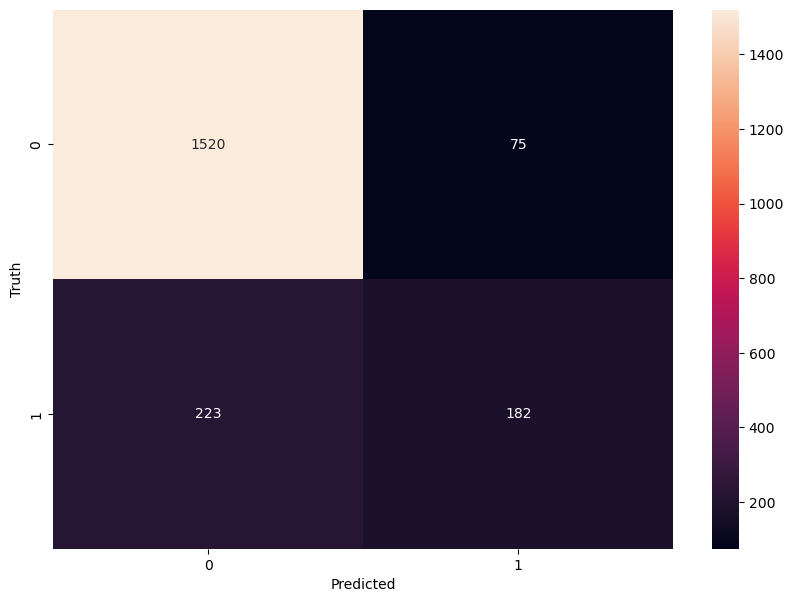

In [49]:
#plotting confusion matrix of model 1

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_1)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


Text(95.72222222222221, 0.5, 'Truth')

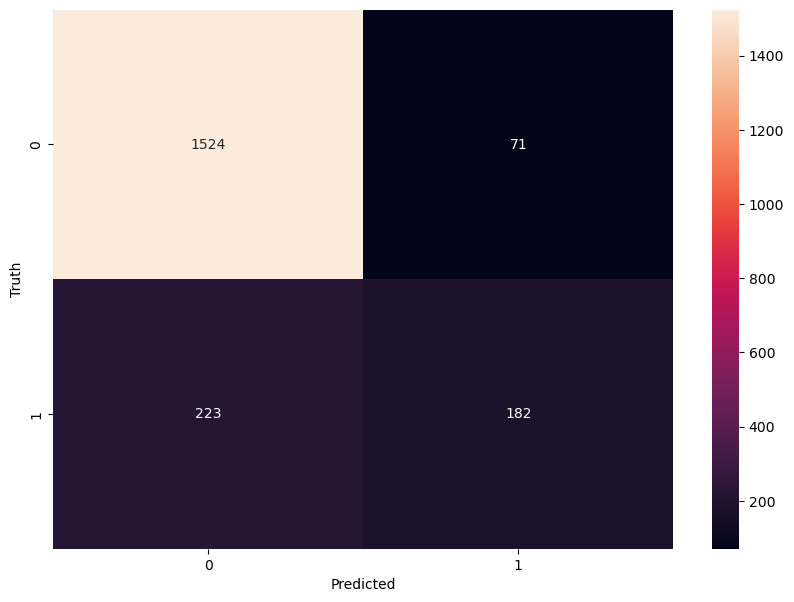

In [50]:
#plotting confusion matrix of model 2

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_2)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
